In [38]:
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from pandas import Series
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt
%matplotlib inline

In [155]:
data = pd.read_csv('./input/IPG2211A2N.csv', index_col=0)

In [156]:
#data = pd.read_csv('./input/AMZN.csv', index_col=0)

In [157]:
data.head()

,IPG2211A2N
DATE,
1939-01-01,3.3842
1939-02-01,3.4100
1939-03-01,3.4875
1939-04-01,3.5133
1939-05-01,3.5133


In [158]:
data.shape

(961, 1)

In [159]:
data.index = pd.to_datetime(data.index)

In [160]:
data.head()

,IPG2211A2N
DATE,
1939-01-01,3.3842
1939-02-01,3.4100
1939-03-01,3.4875
1939-04-01,3.5133
1939-05-01,3.5133


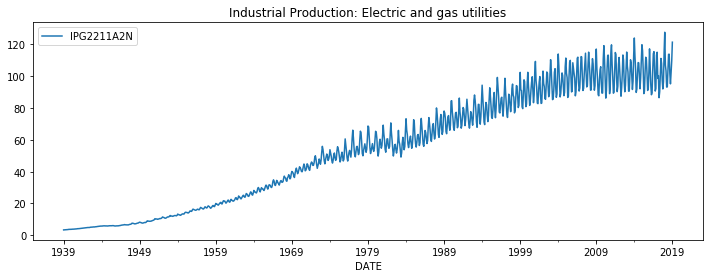

In [161]:
data.plot(title="Industrial Production: Electric and gas utilities",figsize=(12,4))

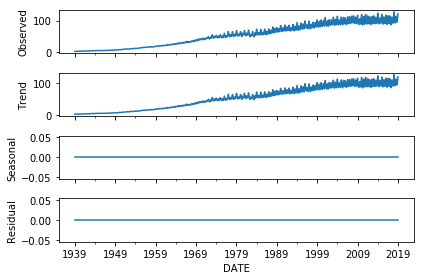

In [162]:
result = seasonal_decompose(data, model='addictive', freq=1)
result.plot()
plt.show()

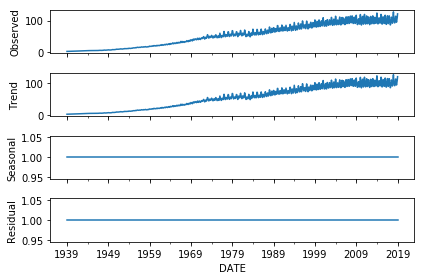

In [163]:
result = seasonal_decompose(data, model='multiplicative', freq=1)
result.plot()
plt.show()

## modeling

In [164]:
from pyramid.arima import auto_arima
stepwise_model = auto_arima(data,n_jobs=4)
print('AIC : ', stepwise_model.aic())
print('Params : ', stepwise_model.params())

AIC :  4382.370162536188
Params :  [ 0.07481598  0.63877912 -0.02685237 -0.97016563  0.61182169 -0.93531661
 -0.0240733   0.93706474 -0.84643635  5.34811099]


In [173]:
train = data.loc['1985-01-01':'2016-12-01']
test = data.loc['2017-01-01':]

In [174]:
#train = data.iloc[:5058,:]
#test = data.iloc[5058:,:]

In [175]:
stepwise_model.fit(train)

ARIMA(callback=None, disp=0, maxiter=50, method=None, order=(4, 1, 4),
   out_of_sample_size=0, scoring='mse', scoring_args={},
   seasonal_order=(0, 0, 0, 1), solver='lbfgs', start_params=None,
   suppress_warnings=False, transparams=True, trend='c')

In [178]:
future_forecast = stepwise_model.predict(n_periods=25)

In [179]:
future_forecast = pd.DataFrame(future_forecast,index = test.index,columns=['Prediction'])
compare = pd.concat([test,future_forecast],axis=1)

In [180]:
compare

,IPG2211A2N,Prediction
DATE,,
2017-01-01,115.1100,121.639729
2017-02-01,98.7900,117.010542
2017-03-01,100.3838,103.630051
2017-04-01,86.5178,93.966426
2017-05-01,90.2272,97.773067
2017-06-01,100.5536,110.662306
2017-07-01,111.2244,120.062670
2017-08-01,108.0286,116.195151
2017-09-01,97.2464,103.357407


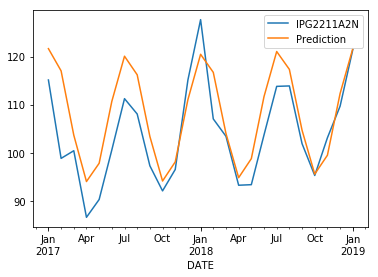

In [181]:
compare.plot()